# Analyse des données

### Import des librairies 

In [1]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [4]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import plotly.express as px

# Les dictionnaires necessaire pour passer de num a str

In [72]:
departements_noms = {
    1: "Ain", 2: "Aisne", 3: "Allier", 4: "Alpes-de-Haute-Provence",
    5: "Hautes-Alpes", 6: "Alpes-Maritimes", 7: "Ardèche", 8: "Ardennes",
    9: "Ariège", 10: "Aube", 11: "Aude", 12: "Aveyron", 13: "Bouches-du-Rhône",
    14: "Calvados", 15: "Cantal", 16: "Charente", 17: "Charente-Maritime",
    18: "Cher", 19: "Corrèze", 20: "Corse", 21: "Côte-d'Or",
    22: "Côtes-d'Armor", 23: "Creuse", 24: "Dordogne", 25: "Doubs",
    26: "Drôme", 27: "Eure", 28: "Eure-et-Loir", 29: "Finistère",
    30: "Gard", 31: "Haute-Garonne", 32: "Gers", 33: "Gironde", 34: "Hérault",
    35: "Ille-et-Vilaine", 36: "Indre", 37: "Indre-et-Loire", 38: "Isère",
    39: "Jura", 40: "Landes", 41: "Loir-et-Cher", 42: "Loire", 43: "Haute-Loire",
    44: "Loire-Atlantique", 45: "Loiret", 46: "Lot", 47: "Lot-et-Garonne",
    48: "Lozère", 49: "Maine-et-Loire", 50: "Manche", 51: "Marne",
    52: "Haute-Marne", 53: "Mayenne", 54: "Meurthe-et-Moselle", 55: "Meuse",
    56: "Morbihan", 57: "Moselle", 58: "Nièvre", 59: "Nord", 60: "Oise",
    61: "Orne", 62: "Pas-de-Calais", 63: "Puy-de-Dôme", 64: "Pyrénées-Atlantiques",
    65: "Hautes-Pyrénées", 66: "Pyrénées-Orientales", 67: "Bas-Rhin",
    68: "Haut-Rhin", 69: "Rhône", 70: "Haute-Saône", 71: "Saône-et-Loire",
    72: "Sarthe", 73: "Savoie", 74: "Haute-Savoie", 75: "Paris",
    76: "Seine-Maritime", 77: "Seine-et-Marne", 78: "Yvelines", 79: "Deux-Sèvres",
    80: "Somme", 81: "Tarn", 82: "Tarn-et-Garonne", 83: "Var", 84: "Vaucluse",
    85: "Vendée", 86: "Vienne", 87: "Haute-Vienne", 88: "Vosges", 89: "Yonne",
    90: "Territoire de Belfort", 91: "Essonne", 92: "Hauts-de-Seine", 
    93: "Seine-Saint-Denis", 94: "Val-de-Marne", 95: "Val-d'Oise",
    971: "Guadeloupe", 972: "Martinique", 973: "Guyane",
    974: "La Réunion", 976: "Mayotte"
}

typeContrat_num_2_str_dict = {
    0 : 'CDI',
    1 : 'CDD',
    2 : 'MIS', 
    3 : 'DIN', 
    4 : 'CCE', 
    5 : 'LIB', 
    6 : 'FRA', 
    7 : 'SAI', 
    8 : 'REP', 
    9 : 'DDI', 
    10 : 'TTI'
}

qualification_num_2_str_dict = {
    8.0: "Agent de maîtrise",
    6.0: "Employé qualifié",
    9.0: "Cadre",
    5.0: "Employé non qualifié",
    2.0: "Ouvrier spécialisé",
    7.0: "Technicien",
    3.0: "Ouvrier qualifié (P1,P2)",
    1.0: "Manœuvre",
    4.0: "Ouvrier qualifié (P3,P4,OHQ)"
}

### Import du dataset 

In [5]:
file_path =r'Romain_Scrapping\offres_emploi_concatene_cleaned.csv'
df=pd.read_csv(file_path)
df.head()

,intitule,source,departement,salaire_annuel,etude_requise,experience_requise,contrat,romeCode_extract,tps_Pp,secteur_activite,qualificationCode
0,Administrateur systèmes et réseaux informatiqu...,Informatique,41.0,38000.0,5.0,24.0,2,M18,1.0,78.0,8.0
1,Technicien informatique F/H,Informatique,69.0,24238.0,NaN,12.0,2,H11,1.0,78.0,6.0
2,Ingénieur de production/exploitation informati...,Informatique,41.0,35000.0,5.0,60.0,2,M18,1.0,78.0,9.0
3,Technicien informatique (H/F),Informatique,NaN,27000.0,5.0,0.0,0,I14,1.0,66.0,5.0
4,Chef de projet réseau informatique (H/F),Informatique,74.0,45000.0,NaN,132.0,0,M18,1.0,78.0,2.0


# Distribution des différente catégories

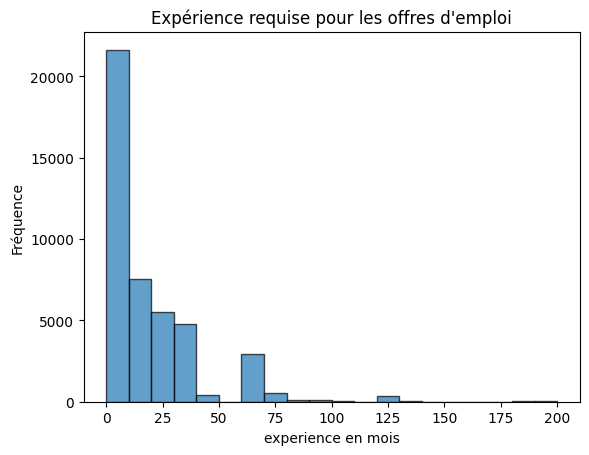

In [52]:
import pandas as pd
import matplotlib.pyplot as plt


# Limiter les valeurs de 'experience_requise' à un maximum de 200
df['experience_requise'] = df['experience_requise'].clip(upper=200)
plt.hist(df['experience_requise'], bins=20, edgecolor='black', alpha=0.7)
plt.title("Expérience requise pour les offres d'emploi")
plt.xlabel("experience en mois")
plt.ylabel("Fréquence")
plt.show()


In [53]:
# Remplacer les codes de départements par leurs noms
df['departement_nom'] = df['departement'].map(departements_noms)
# Les 5 départements qui recrutent le plus et le moins
departments_count = df["departement_nom"].value_counts()
top_5_departments = departments_count.head(10)
bottom_5_departments = departments_count.tail(10)
# Affichage des résultats
print("Top 5 départements qui recrutent le plus :")
print(top_5_departments)

print("\nTop 5 départements qui recrutent le moins :")
print(bottom_5_departments)

Top 5 départements qui recrutent le plus :
departement_nom
Paris               1943
Rhône               1870
Hauts-de-Seine      1539
Bouches-du-Rhône    1462
Gironde             1405
Loire-Atlantique    1349
Haute-Garonne       1164
Nord                1161
Ille-et-Vilaine      833
Yvelines             765
Name: count, dtype: int64

Top 5 départements qui recrutent le moins :
departement_nom
Lozère                     83
Alpes-Maritimes            33
Ain                        11
Ardèche                    11
Aisne                      10
Alpes-de-Haute-Provence    10
Allier                      8
Hautes-Alpes                7
Ardennes                    7
Ariège                      2
Name: count, dtype: int64


In [62]:
# Pourcentage pour chaque type de contrat
df['contrat_nom'] = df['contrat'].map(typeContrat_num_2_str_dict)
contract_percentage = (df["contrat_nom"].value_counts(normalize=True) * 100).round(2)
print("\nPourcentage pour chaque type de contrat :")
print(contract_percentage)


Pourcentage pour chaque type de contrat :
contrat_nom
CDI    67.47
CDD    17.87
MIS     6.14
LIB     2.97
CCE     2.63
FRA     1.78
SAI     1.05
DIN     0.06
DDI     0.02
REP     0.00
TTI     0.00
Name: proportion, dtype: float64


In [70]:
# Les 5 plus grands romeCodes
top_5_romecodes = df["romeCode_extract"].value_counts().head(10)
bottom_5_romecodes = df["romeCode_extract"].value_counts().tail(10)


print("\nTop 10 Rome Codes :")
print(top_5_romecodes)


Top 10 Rome Codes :
romeCode_extract
M18    5190
C15    3340
M15    3008
D14    2615
M12    2539
K12    2415
J15    1936
M17    1783
I16    1646
H13    1608
Name: count, dtype: int64


In [73]:
df["qualificationCode_str"] = df["qualificationCode"].map(qualification_num_2_str_dict)
# Pourcentage d'offres pour chaque qualificationCode
qualification_percentage = (df["qualificationCode_str"].value_counts(normalize=True) * 100).round(2)
print("\nPourcentage des offres par qualificationCode :")
print(qualification_percentage)


Pourcentage des offres par qualificationCode :
qualificationCode_str
Employé qualifié                42.91
Cadre                           15.12
Employé non qualifié            13.42
Technicien                      11.52
Agent de maîtrise                7.33
Ouvrier spécialisé               4.20
Ouvrier qualifié (P1,P2)         3.21
Manœuvre                         1.55
Ouvrier qualifié (P3,P4,OHQ)     0.74
Name: proportion, dtype: float64


## Distribution des salaires 

#### Boxplot

Statistiques descriptives des salaire_annuels :
count     21691.000000
mean      31575.822865
std       12818.259693
min        4410.000000
25%       23520.000000
50%       27500.000000
75%       35000.000000
max      182000.000000
Name: salaire_annuel, dtype: float64


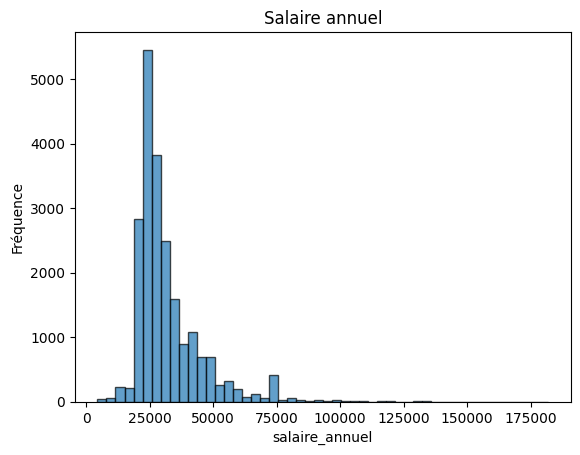

In [7]:
print("Statistiques descriptives des salaire_annuels :")
print(df['salaire_annuel'].describe())

# Histogramme de la répartition des salaire_annuels
plt.hist(df['salaire_annuel'], bins=50, edgecolor='black', alpha=0.7)
plt.title("Salaire annuel")
plt.xlabel("salaire_annuel")
plt.ylabel("Fréquence")
plt.show()

Ici la distribution est très générale vu qu'on ne sépare pas par catégorie, donc ceci ne nous raporte que peu d'information: dans nos données le salaire médian est autour de 27500 euros.

## Répartition des salaires par catégorie (transport, media, etc )

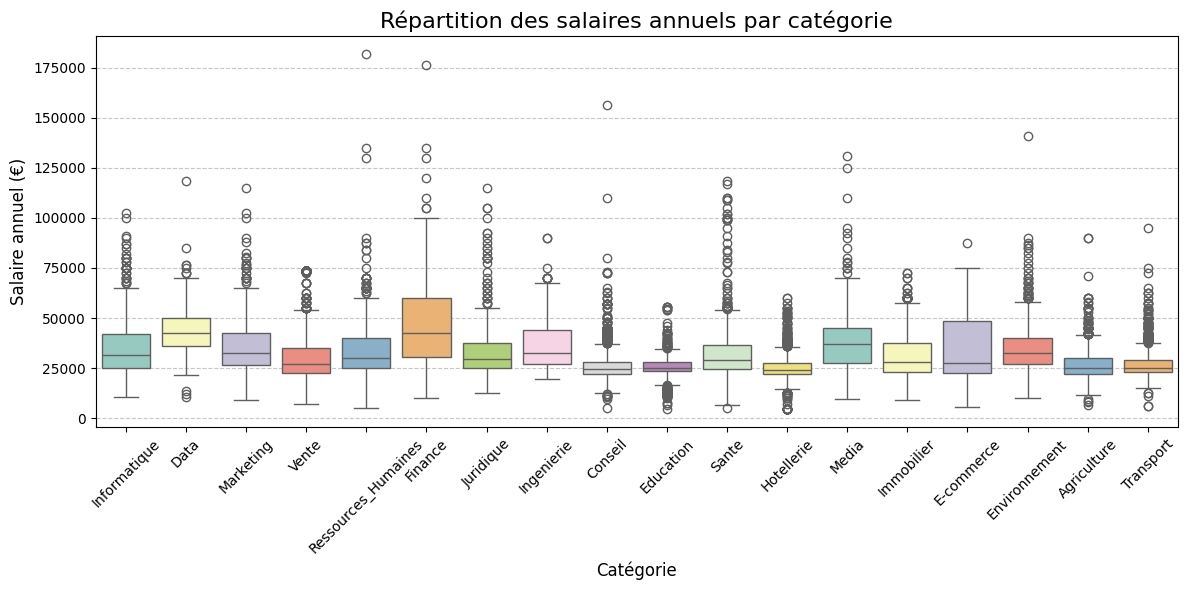

In [9]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='source', y='salaire_annuel', hue='source', palette='Set3', dodge=False, legend=False)
plt.title("Répartition des salaires annuels par catégorie", fontsize=16)
plt.xlabel('Catégorie', fontsize=12)
plt.ylabel('Salaire annuel (€)', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

On remarque que la catégorie qui paye le mieux est la finance (résultat prédictible), alors que les domaines tels que la vente, l'éducation, le conseil ou le transport payent moins

## Répartition des salaires par région

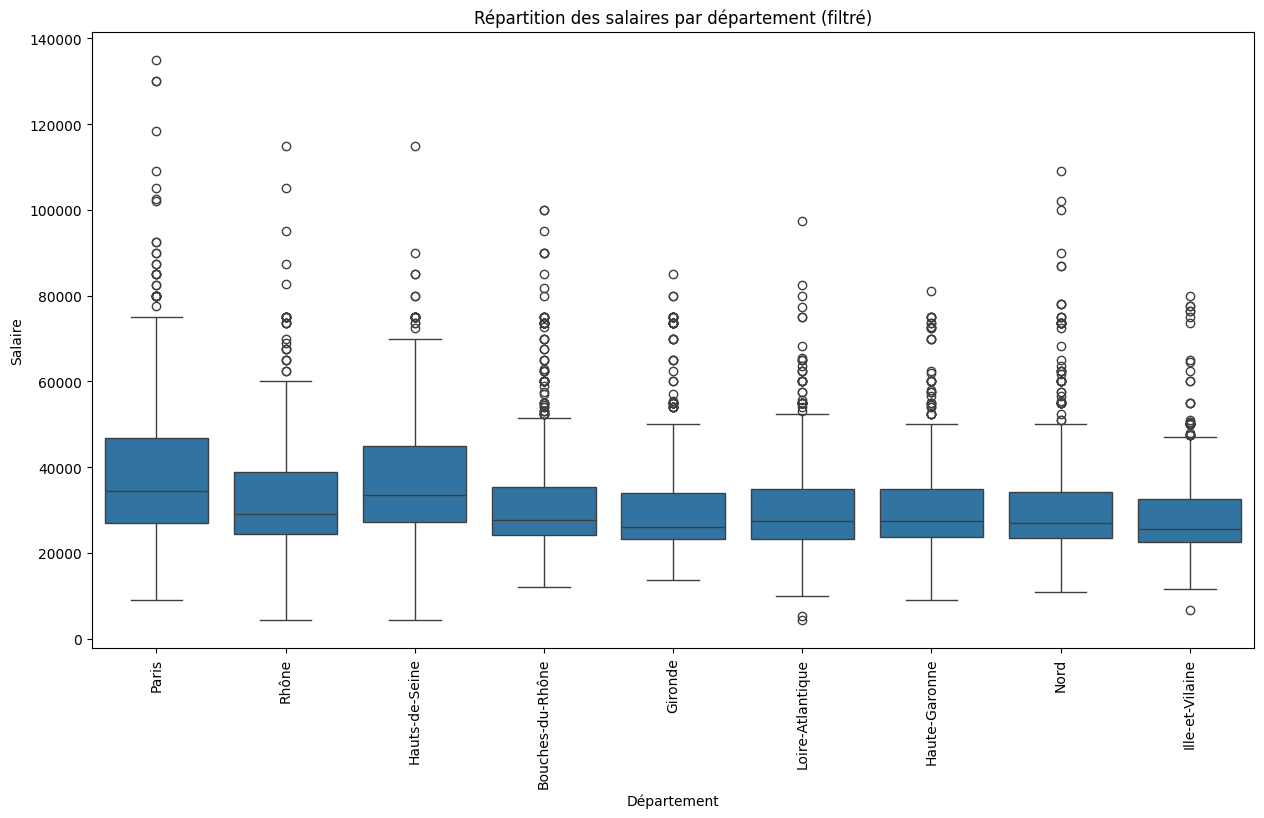

In [23]:
# Définir le seuil minimum d'offres par région
seuil_offres = 800

# Ajouter une colonne 'Nom Département' en utilisant le dictionnaire
df['Nom Département'] = df['departement'].map(departements_noms)

# Filtrer les départements avec un nombre d'offres supérieur ou égal au seuil
offres_par_departement = df['Nom Département'].value_counts()
departements_a_garder = offres_par_departement[offres_par_departement >= seuil_offres].index
df_filtre = df[df['Nom Département'].isin(departements_a_garder)]

# Créer le boxplot pour les départements avec suffisamment d'offres
plt.figure(figsize=(15, 8))
sns.boxplot(
    x='Nom Département', 
    y='salaire_annuel', 
    data=df_filtre, 
    order=departements_a_garder
)
plt.title("Répartition des salaires par département (filtré)")
plt.xticks(rotation=90)
plt.xlabel("Département")
plt.ylabel("Salaire")
plt.show()

On remarque que les plus haut salaires sont sur Paris

## Répartition des salaires par années d'études requises

In [16]:
etude_num_2_str_dict  = {
    0 : "Aucune formation",
    1 : "4eme achevee",
    2 : "3eme achevee ou Brevet",
    3 : "CAP, BEP ou equivalent",
    4 : "Bac ou equivalent",
    5 : "Bac +2 ou equivalent",
    6 : "Bac +3 ou equivalent",
    7 : "Bac +4 ou equivalent",
    8 : "Bac +5 ou equivalent"
}

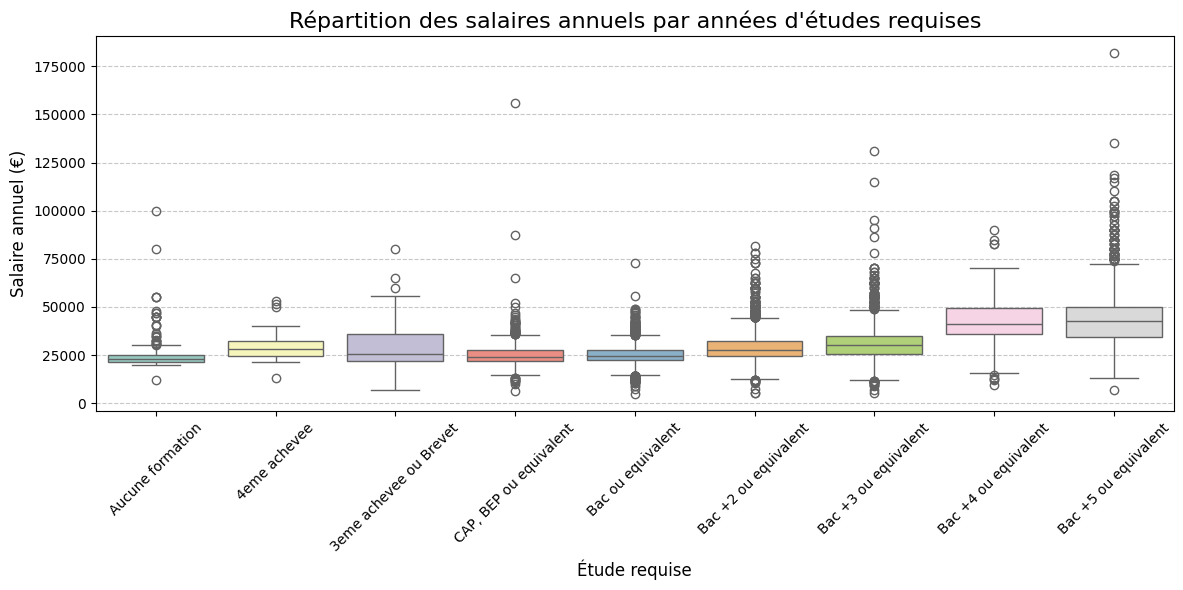

In [20]:
# Remplacement des valeurs numériques par les descriptions textuelles dans la colonne 'etude_requise'
df['etude_requise_str'] = df['etude_requise'].map(etude_num_2_str_dict)

# Définir un ordre pour la colonne textuelle
df['etude_requise_str'] = pd.Categorical(df['etude_requise_str'], 
                                         categories=[etude_num_2_str_dict[i] for i in range(len(etude_num_2_str_dict))], 
                                         ordered=True)

# Création du graphique
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='etude_requise_str', y='salaire_annuel', hue='etude_requise_str', palette='Set3', dodge=False)
plt.legend([],[], frameon=False)  # Supprime la légende
plt.title("Répartition des salaires annuels par années d'études requises", fontsize=16)
plt.xlabel('Étude requise', fontsize=12)
plt.ylabel('Salaire annuel (€)', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Repartition des salaires par qualification du metier

In [30]:
qualification_num_2_str_dict = {
    8.0: "Agent de maîtrise",
    6.0: "Employé qualifié",
    9.0: "Cadre",
    5.0: "Employé non qualifié",
    2.0: "Ouvrier spécialisé",
    7.0: "Technicien",
    3.0: "Ouvrier qualifié (P1,P2)",
    1.0: "Manœuvre",
    4.0: "Ouvrier qualifié (P3,P4,OHQ)",
    0 : "Non renseigné"
}

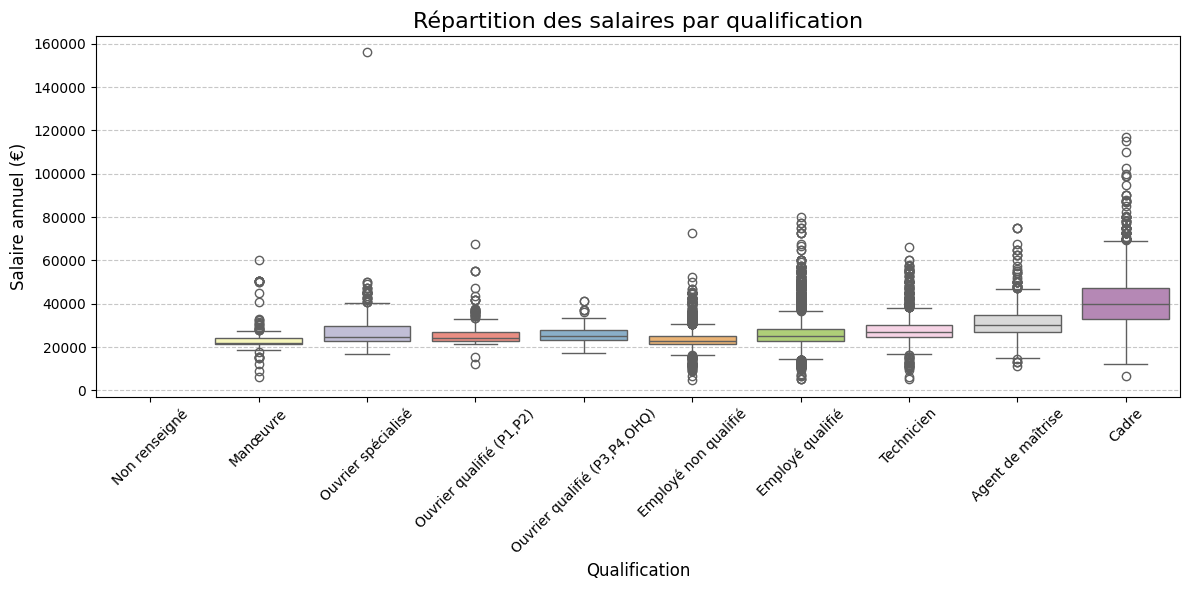

In [33]:
# Remplacement des valeurs numériques par les descriptions textuelles dans la colonne 'qualificationCode'
df['qualificationCode_str'] = df['qualificationCode'].map(qualification_num_2_str_dict)

# Définir un ordre pour la colonne textuelle
df['qualificationCode_str'] = pd.Categorical(df['qualificationCode_str'], 
                                         categories=[qualification_num_2_str_dict[i] for i in range(len(qualification_num_2_str_dict))], 
                                         ordered=True)

# Création du graphique
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='qualificationCode_str', y='salaire_annuel', hue='qualificationCode_str', palette='Set3', dodge=False)
plt.legend([],[], frameon=False)  # Supprime la légende
plt.title("Répartition des salaires par qualification", fontsize=16)
plt.xlabel('Qualification', fontsize=12)
plt.ylabel('Salaire annuel (€)', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

## We can do a pie chart by catégorie and see what companies are hiring the most
#### maybe even by region 

In [15]:
file_path_1 ='/Users/saimanenawal/Documents/fichier_concaténé1.csv'

In [16]:
df_1=pd.read_csv(file_path_1)
print(df_1.head())

           company                                          job_title  \
0  Tenzing Conseil               Manager Transformations durables H/F   
1     SAPER VEDERE  Social Media Analyst & Conseil en Influence / ...   
2          Eskimoz                  Consultant Paid Media H/F - stage   
3            Talan                                  Manager Média H/F   
4        datashake         Consultant Paid Media Senior - CDI - Paris   

                                 date             contract  \
0   Friday 06 December 2024, 08:15 AM                  CDI   
1   Tuesday 29 October 2024, 10:53 AM  Stage (6 à 12 mois)   
2  Tuesday 03 December 2024, 10:49 AM       Stage (6 mois)   
3  Tuesday 24 December 2024, 09:01 AM                  CDI   
4  Tuesday 24 December 2024, 08:37 AM                  CDI   

               location         salary               clock  \
0                 Paris   Non spécifié   30 septembre 2024   
1                   NaN   Non spécifié     05 janvier 2025   
2 

In [17]:
D=["Media","communication marketing", "Education","Juridique","Informatique technologie", "conseil stratégie", "finance", "Comptabilité", "Transport", "Hotellerie", "graphisme", "Immobilier", "Data", "e-commerce", "Environnement", "audit", "santé", "Agriculture","commercial business developer sales", "Ingénierie", "ressources humaines"]

In [24]:
def pie_chart_cat(df, categorie):
    df_filtered = df[df['catégorie'] == categorie]
    company_counts= df_filtered['company'].value_counts()
    plt.figure(figsize=(12, 6))
    sns.barplot(x=company_counts.index, y=company_counts.values, palette='viridis' )
    plt.title(f"Distribution des entreprises recrutant pour la catégorie : {categorie}")
    plt.xlabel('Entreprises', fontsize=12)
    plt.ylabel("Nombre d'offres", fontsize=12)
    plt.xticks(rotation=90)
    plt.show()

#### Exemple pour la catégorie Media

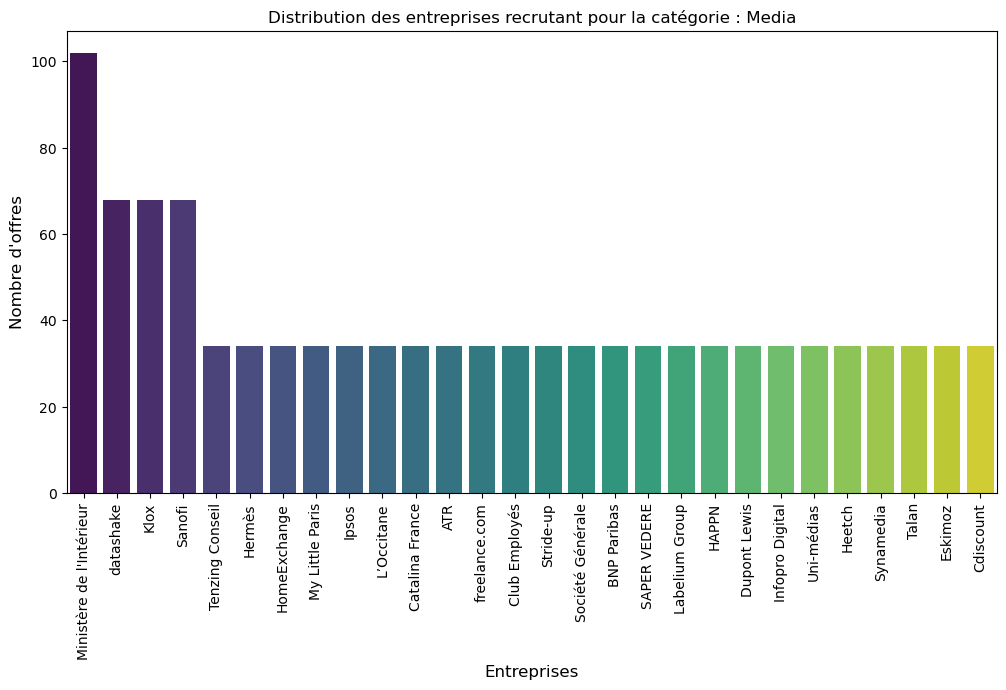

In [25]:
pie_chart_cat(df_1,"Media" )